<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest

In [2]:
path = '/content/drive/MyDrive/Dataset/extended_marketing_data_new.xlsx'

In [5]:
df = pd.read_excel(path)
df.head(20)

,Customer ID,Age,Gender,Total Spent,Converted,Comments,Purchased Category,Stock
0,1,23,F,150,1,Satisfied with the service,Clothing,4
1,2,35,M,600,1,Needs improvement in delivery,Beauty,86
2,3,45,F,800,0,Regular customer,Books,24
3,4,52,M,200,0,Occasional buyer,Beauty,10
4,5,29,F,300,1,High spender,Books,47
5,6,41,M,450,0,Average experience,Books,86
6,7,38,F,670,1,Prefers online shopping,Home Goods,69
7,8,27,M,120,1,New customer,Home Goods,0
8,9,50,F,500,0,Loyal to the brand,Electronics,86
9,10,33,M,750,1,High conversion rate,Clothing,45


In [7]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = isolation_forest.fit_predict(df[['Total Spent', 'Age']])


anomalies = df[df['Anomaly'] == -1]
print(anomalies[['Customer ID', 'Age', 'Total Spent']])

   Customer ID  Age  Total Spent
3            4   52          200


In [8]:
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = isolation_forest.fit_predict(df[['Age', 'Total Spent']])


anomalies = df[df['Anomaly'] == -1]
print(anomalies)

   Customer ID  Age Gender  Total Spent  ...          Comments Purchased Category Stock  Anomaly
2            3   45      F          800  ...  Regular customer              Books    24       -1

[1 rows x 9 columns]


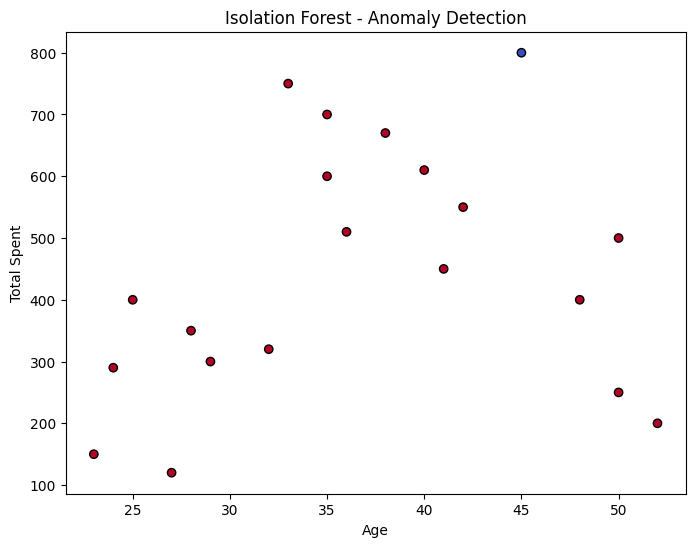

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Total Spent'], c=df['Anomaly'], cmap='coolwarm', edgecolors='k')
plt.title('Isolation Forest - Anomaly Detection')
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.show()

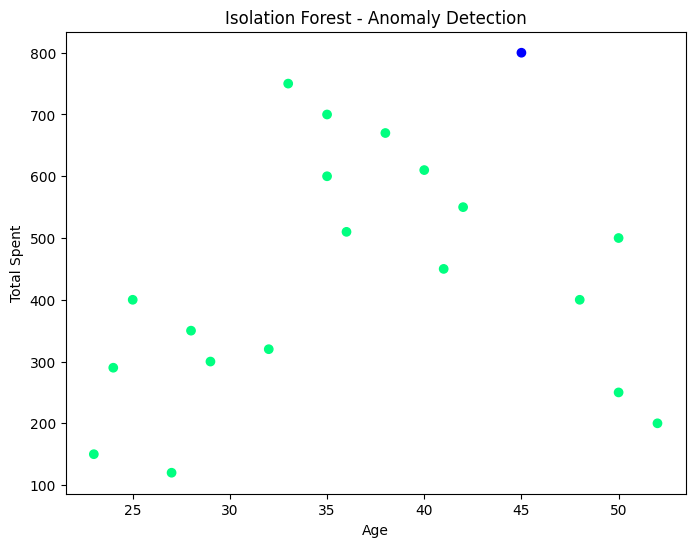

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Total Spent'], c=df['Anomaly'], cmap='winter', edgecolors='face')
plt.title('Isolation Forest - Anomaly Detection')
plt.xlabel('Age')
plt.ylabel('Total Spent')
plt.show()

In [16]:
category_anomalies = anomalies.groupby('Purchased Category')['Customer ID'].count()
print(category_anomalies)

Purchased Category
Books    1
Name: Customer ID, dtype: int64


In [17]:
anomaly_percentage = len(anomalies) / len(df) * 100
print(f'Percentage of anomalies: {anomaly_percentage:.2f}%')

Percentage of anomalies: 5.00%


In [18]:
anomalies['Age_Group'] = pd.cut(anomalies['Age'], bins=[18, 25, 35, 45, 55], labels=['18-25', '26-35', '36-45', '46-55'])
age_group_counts = anomalies['Age_Group'].value_counts()
print(age_group_counts)

Age_Group
36-45    1
18-25    0
26-35    0
46-55    0
Name: count, dtype: int64


<ipython-input-18-c42bb3deb46f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomalies['Age_Group'] = pd.cut(anomalies['Age'], bins=[18, 25, 35, 45, 55], labels=['18-25', '26-35', '36-45', '46-55'])


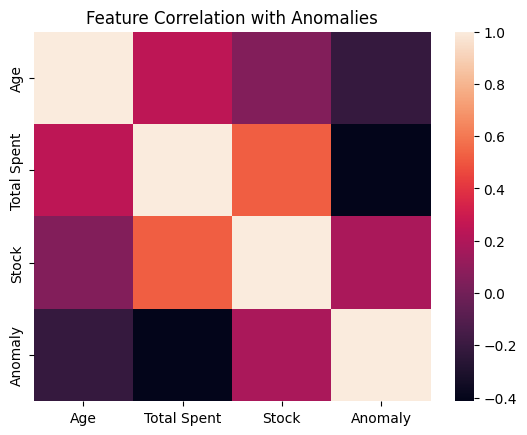

In [19]:
import seaborn as sns


sns.heatmap(df[['Age', 'Total Spent', 'Stock', 'Anomaly']].corr())
plt.title('Feature Correlation with Anomalies')
plt.show()

In [20]:
contaminations = [0.05, 0.1, 0.2]
for cont in contaminations:
    isolation_forest = IsolationForest(contamination=cont, random_state=42)
    df['Anomaly'] = isolation_forest.fit_predict(df[['Total Spent', 'Age']])
    print(f'Contamination: {cont}, Anomalies Detected: {sum(df["Anomaly"] == -1)}')

Contamination: 0.05, Anomalies Detected: 1
Contamination: 0.1, Anomalies Detected: 2
Contamination: 0.2, Anomalies Detected: 4


In [21]:
df['Anomaly_Label'] = df['Anomaly'].apply(lambda x: 'High Risk' if x == -1 else 'Normal')
print(df[['Customer ID', 'Anomaly_Label']].head())

   Customer ID Anomaly_Label
0            1     High Risk
1            2        Normal
2            3     High Risk
3            4     High Risk
4            5        Normal


In [22]:
from scipy.stats import ttest_ind

anomalous_spending = df[df['Anomaly'] == -1]['Total Spent']
normal_spending = df[df['Anomaly'] == 1]['Total Spent']
t_stat, p_value = ttest_ind(anomalous_spending, normal_spending)

print(f'T-statistic: {t_stat}, p_value: {p_value}')

T-statistic: -1.4717184640210486, p_value: 0.15836516643283502


In [23]:
top_anomalous_spender = anomalies.loc[anomalies['Total Spent'].idxmax()]
print(top_anomalous_spender)

Customer ID                          3
Age                                 45
Gender                               F
Total Spent                        800
Converted                            0
Comments              Regular customer
Purchased Category               Books
Stock                               24
Anomaly                             -1
Age_Group                        36-45
Name: 2, dtype: object


In [24]:
anomalous_comments = anomalies[['Customer ID', 'Comments']]
print(anomalous_comments)

   Customer ID          Comments
2            3  Regular customer


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Scaled_Total_Spent', 'Scaled_Age']] = scaler.fit_transform(df[['Total Spent', 'Age']])


isolation_forest = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = isolation_forest.fit_predict(df[['Scaled_Total_Spent', 'Scaled_Age']])

anomalies = df[df['Anomaly'] == -1]
print("Anomalous Data Points:")
print(anomalies[['Customer ID', 'Age', 'Total Spent', 'Scaled_Total_Spent', 'Scaled_Age']])

Anomalous Data Points:
   Customer ID  Age  Total Spent  Scaled_Total_Spent  Scaled_Age
2            3   45          800            1.805699    0.933398
3            4   52          200           -1.254808    1.715887


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Scaled_Total_Spent', 'Scaled_Age']] = scaler.fit_transform(df[['Total Spent', 'Age']])


isolation_forest = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = isolation_forest.fit_predict(df[['Scaled_Total_Spent', 'Scaled_Age']])

normal_points = df[df['Anomaly'] == 1]
print("\nNormal Data Points:")
print(normal_points[['Customer ID', 'Age', 'Total Spent', 'Scaled_Total_Spent', 'Scaled_Age']])


Normal Data Points:
    Customer ID  Age  Total Spent  Scaled_Total_Spent  Scaled_Age
0             1   23          150           -1.509850   -1.525854
1             2   35          600            0.785530   -0.184444
4             5   29          300           -0.744724   -0.855149
5             6   41          450            0.020403    0.486261
6             7   38          670            1.142589    0.150909
7             8   27          120           -1.662876   -1.078717
8             9   50          500            0.275446    1.492319
9            10   33          750            1.550657   -0.408012
10           11   40          610            0.836539    0.374477
11           12   24          290           -0.795732   -1.414070
12           13   48          400           -0.234639    1.268751
13           14   32          320           -0.642707   -0.519796
14           15   36          510            0.326454   -0.072660
15           16   28          350           -0.489681  

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Scaled_Total_Spent', 'Scaled_Age']] = scaler.fit_transform(df[['Total Spent', 'Age']])


isolation_forest = IsolationForest(contamination=0.1, random_state=42)
df['Anomaly'] = isolation_forest.fit_predict(df[['Scaled_Total_Spent', 'Scaled_Age']])

num_anomalies = len(anomalies)
num_total = len(df)
print(f"Number of Anomalies: {num_anomalies}")
print(f"Total Number of Obversations: {num_total}")
print(f"Percentage of Anomalies: {num_anomalies / num_total * 100:.2f}%")

Number of Anomalies: 2
Total Number of Obversations: 20
Percentage of Anomalies: 10.00%


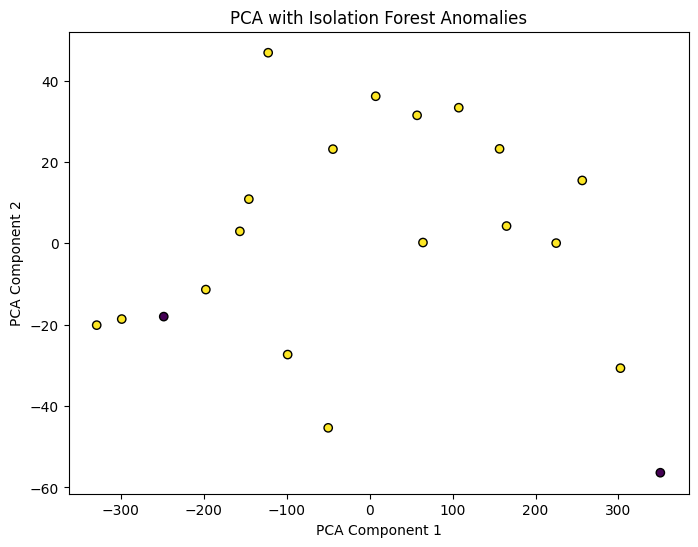

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_results = pca.fit_transform(df[['Total Spent', 'Age', 'Stock']])


plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=df['Anomaly'], cmap='viridis', edgecolor='k')
plt.title('PCA with Isolation Forest Anomalies')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()